
# Real Estate Price Prediction

## Goal
The goal of this project is to predict apartment prices in Tashkent based on features such as size, district, number of rooms, and building characteristics.

We will:
- Clean and preprocess the dataset  
- Explore data with visualizations  
- Engineer new features (log transformations, binary flags, district averages)  
- Build and compare models:  
  - Linear Regression (from scratch)  
  - Decision Tree (simplified)  
  - Random Forest (sklearn)  
- Evaluate models with MSE and R²  
- Draw conclusions about the most important features affecting prices


In [ ]:
#importing 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
#display 
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

#  Data Loading and Cleaning


In [38]:
# 
file_path = "uybor.xls"  
df = pd.read_excel('/Users/dilmurod/Downloads/uybor.xlsx')
df.isnull().sum()

address       0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
lat           0
lng           0
dtype: int64

In [47]:
# Summary statistics
display(df.describe())

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Unique values
print("\nUnique room counts:", sorted(df['rooms'].unique()))
print("\nDistricts:", df['district'].unique())

# Show first rows
display(df.head())


,rooms,size,level,max_levels,price,lat,lng
count,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000
mean,2.619728,73.150726,3.699367,6.031397,59117.618919,41.303620,69.256615
std,1.076887,36.999670,2.239028,2.607673,46701.090308,0.033771,0.059061
min,1.000000,14.000000,1.000000,1.000000,10500.000000,41.186375,69.148915
25%,2.000000,50.000000,2.000000,4.000000,35000.000000,41.281265,69.205802
50%,3.000000,65.000000,3.000000,5.000000,46500.000000,41.296388,69.260189
75%,3.000000,85.000000,5.000000,9.000000,66847.000000,41.324956,69.293713
max,10.000000,456.000000,19.000000,25.000000,800000.000000,41.424522,69.588687


Missing values per column:
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
lat           0
lng           0
dtype: int64

Unique room counts: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(10)]

Districts: ['Yunusobod' 'Yakkasaroy' 'Chilonzor' 'Uchtepa' 'Mirzo Ulugbek'
 'Yashnobod' 'Mirobod' 'Shayhontohur' 'Olmzor' 'Sergeli' 'Yangihayot'
 'Bektemir']


,district,rooms,size,level,max_levels,price,lat,lng
0,Yunusobod,3,57.0,4,4,52000,41.371471,69.281049
1,Yakkasaroy,2,52.0,4,5,56000,41.291115,69.261104
2,Chilonzor,2,42.0,4,4,37000,41.280784,69.223683
3,Chilonzor,3,65.0,1,4,49500,41.290163,69.196862
4,Chilonzor,3,70.0,3,5,55000,41.300156,69.210831


# Exploratary Data Analysis  (EDA)

We explore numerical distributions, detect outliers, and analyze correlations.


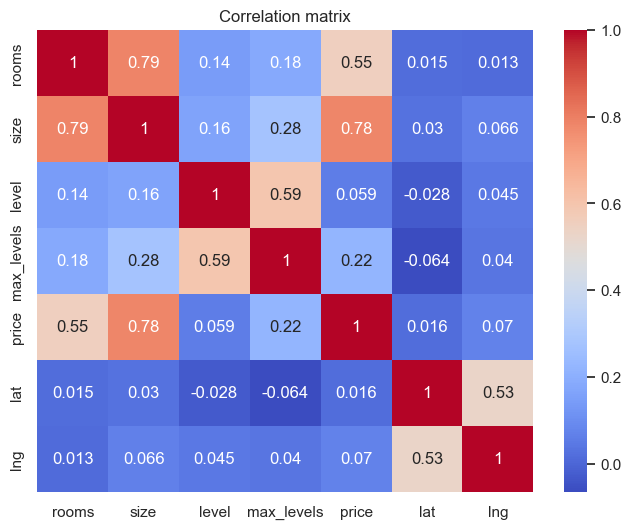

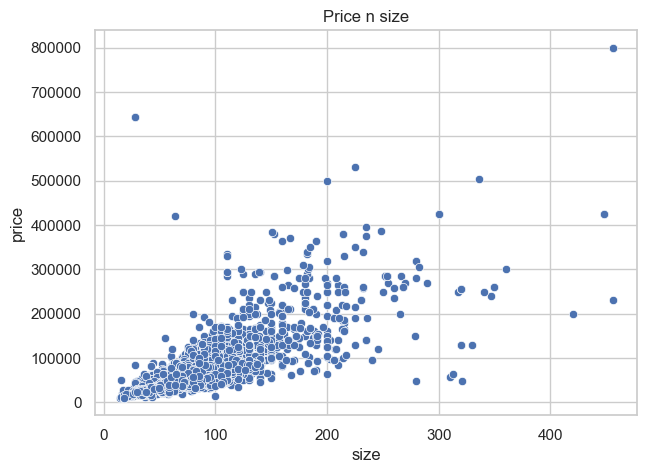

In [41]:


# Correlation 
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()
df_encoded = pd.get_dummies(df, columns=['district'], drop_first=True)
# Price to Size 
plt.figure(figsize=(7,5))
sns.scatterplot(x='size', y='price', data=df)
plt.title('Price n size')
plt.show()


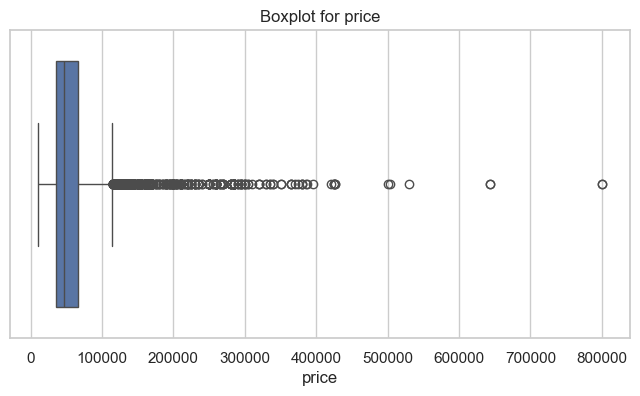

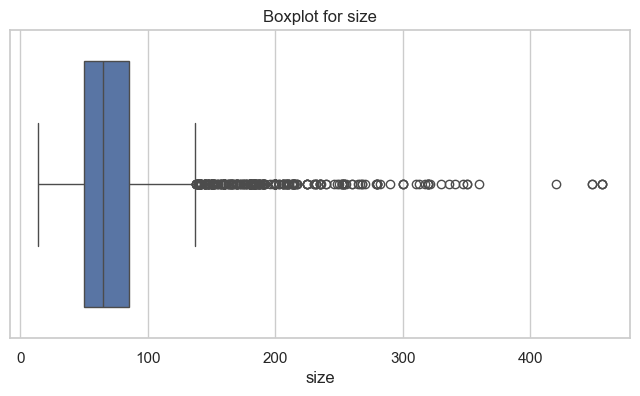

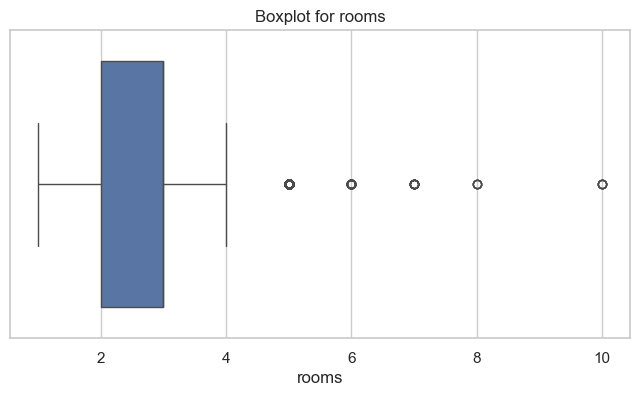

In [48]:
features = ["price", "size", "rooms"]
for col in features:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df_encoded, x=col)
    plt.title(f"Boxplot for {col}")
    plt.show()

# # ⚙️ Feature Engineering

We transform and create new features:
- Log-transformations for price and size
- Price per square meter
- Binary flags: first floor, last floor, pre-last floor, elevator
- Group rare room counts into "5+"
- Calculate average district price
- One-hot encoding for districts


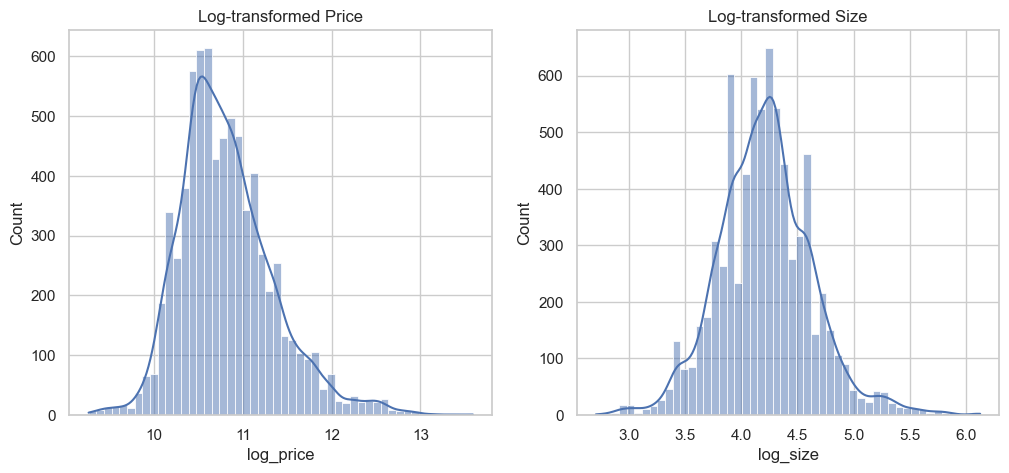

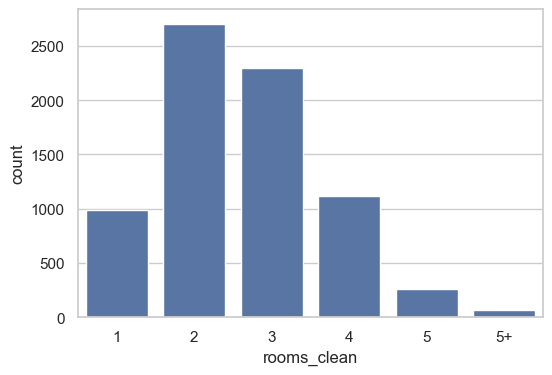

In [16]:
# to deal with outliers w/ log
df_encoded["log_price"] = np.log1p(df["price"])   
df_encoded["log_size"] = np.log1p(df["size"])
df_encoded["rooms_clean"] = df["rooms"].apply(lambda x: "5+" if x > 5 else str(x))

df_encoded["price_per_m2"] = df["price"] / df["size"]
df_encoded["log_price_per_m2"] = np.log1p(df["price_per_m2"])
#visulisation
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df["log_price"], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Log-transformed Price")

sns.histplot(df["log_size"], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Log-transformed Size")

plt.figure(figsize=(6,4))
sns.countplot(x="rooms_clean", data=df, order=sorted(df["rooms_clean"].unique()))

plt.show()


In [12]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7421 entries, 0 to 7420
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   address                 7421 non-null   object 
 1   rooms                   7421 non-null   int64  
 2   size                    7421 non-null   float64
 3   level                   7421 non-null   int64  
 4   max_levels              7421 non-null   int64  
 5   price                   7421 non-null   int64  
 6   lat                     7421 non-null   float64
 7   lng                     7421 non-null   float64
 8   district_Chilonzor      7421 non-null   bool   
 9   district_Mirobod        7421 non-null   bool   
 10  district_Mirzo Ulugbek  7421 non-null   bool   
 11  district_Olmzor         7421 non-null   bool   
 12  district_Sergeli        7421 non-null   bool   
 13  district_Shayhontohur   7421 non-null   bool   
 14  district_Uchtepa        7421 non-null   

In [10]:

#One hot encoding for cagorial features
df_encoded = pd.get_dummies(df, columns=['district'], drop_first=True)
#Feature engeneering 
df_encoded['price_per_m2'] = df_encoded['price'] / df_encoded['size']
avg_price_by_district = df.groupby('district')['price'].mean()
df_encoded['avg_price_district'] = df['district'].map(avg_price_by_district)
df_encoded['elevator'] = (df_encoded['max_levels'] > 4).astype(int)
df_encoded['is_first'] = (df_encoded['level']==1).astype(int)
df_encoded['is_last'] = (df_encoded['level']==df_encoded['max_levels']).astype(int)
df_encoded['is_prelast'] = (df_encoded['level']==df_encoded['max_levels']-1).astype(int)



price                     1.000000
size                      0.781830
rooms                     0.552582
price_per_m2              0.538205
avg_price_district        0.328646
district_Mirobod          0.278335
max_levels                0.219737
elevator                  0.191459
lng                       0.070309
district_Yakkasaroy       0.068944
level                     0.059276
district_Shayhontohur     0.050738
district_Yunusobod        0.026859
lat                       0.015636
is_first                 -0.006827
is_prelast               -0.013084
district_Yangihayot      -0.020591
district_Mirzo Ulugbek   -0.020655
district_Olmzor          -0.029086
district_Yashnobod       -0.046440
district_Sergeli         -0.048938
district_Uchtepa         -0.113621
district_Chilonzor       -0.130728
is_last                  -0.141558
Name: price, dtype: float64


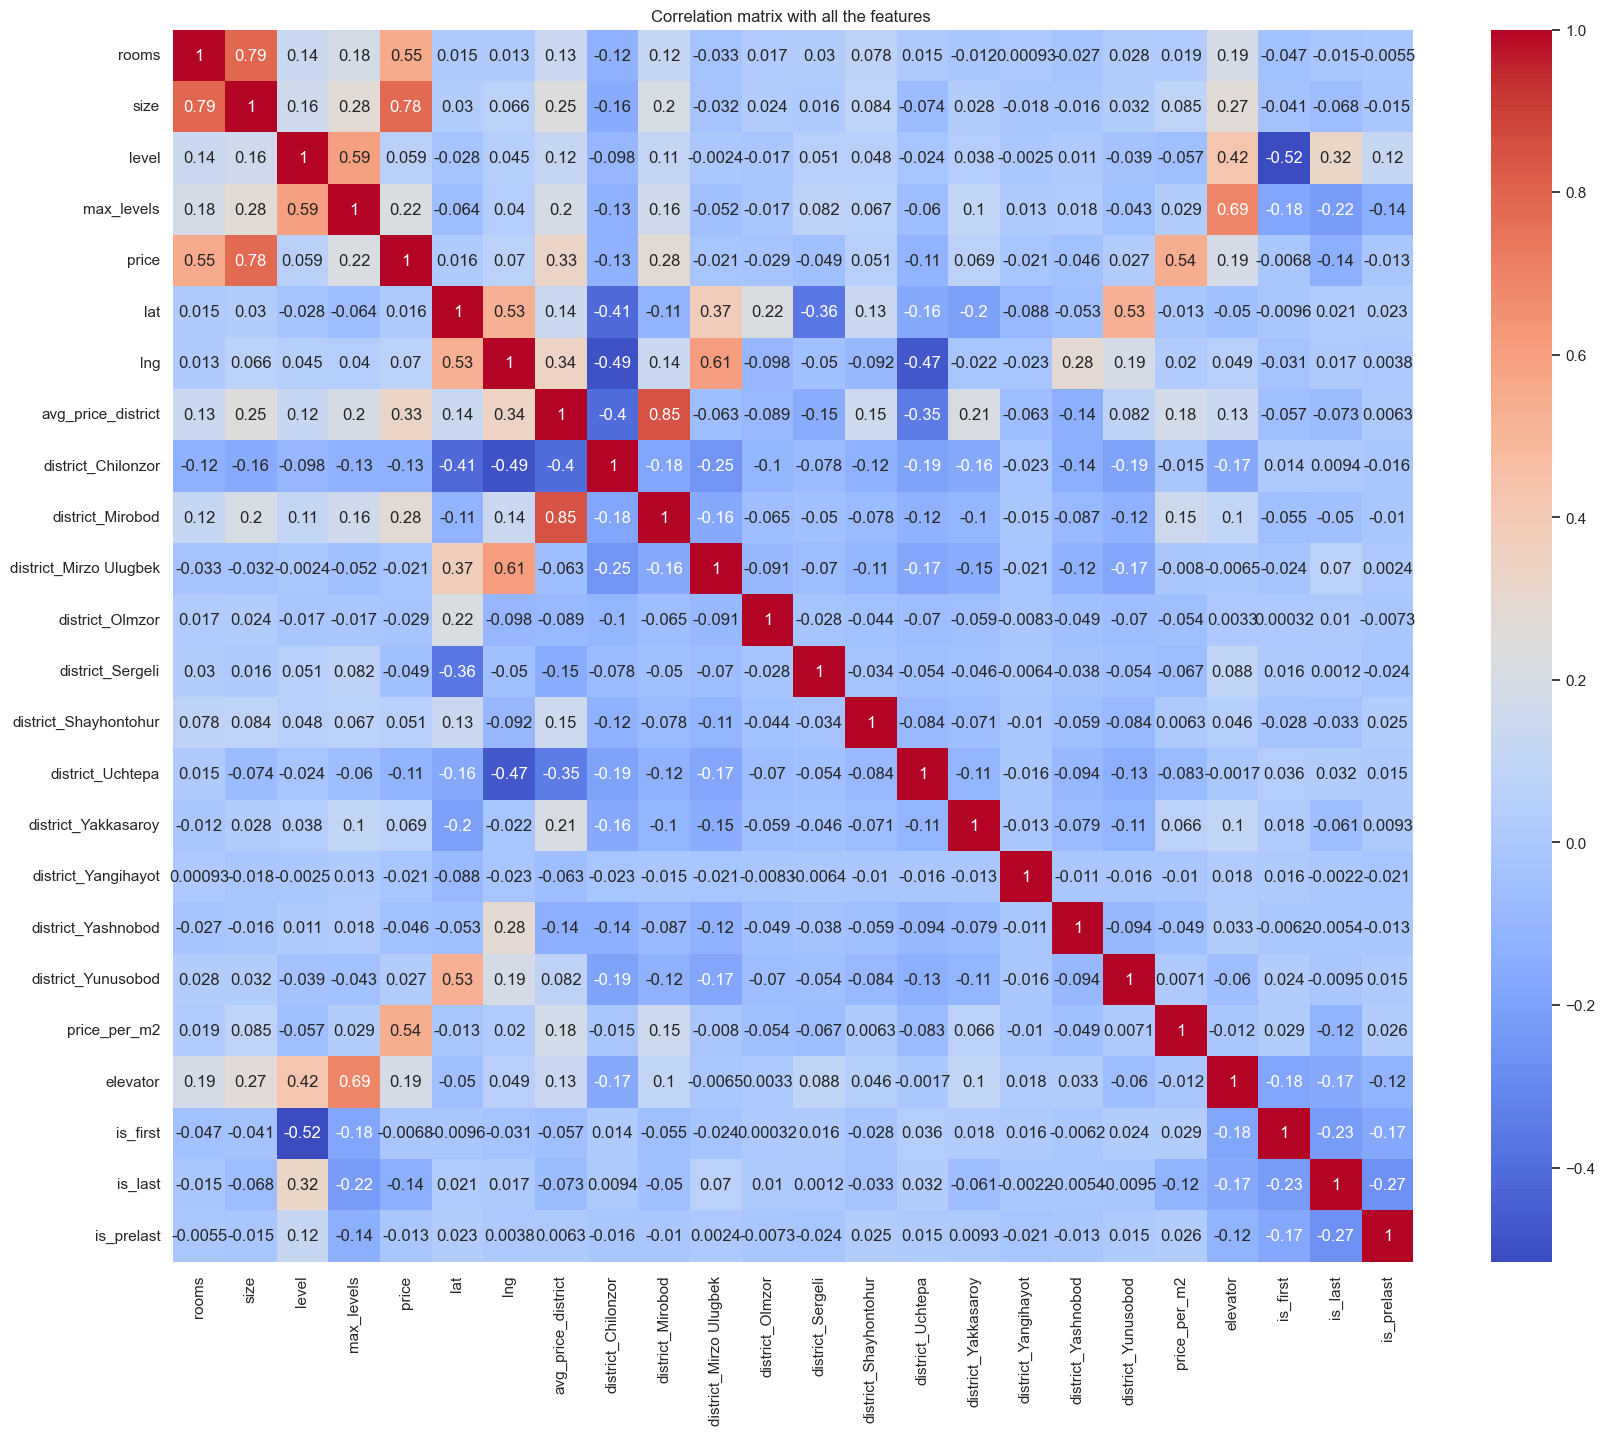

In [58]:


#numeric_df = df_encoded.select_dtypes(include=['int64', 'float64'])
corr_matrix = df_encoded.corr()
corr_with_price = corr_matrix['price'].sort_values(ascending=False)
print(corr_with_price)



plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title("Correlation matrix with all the features ")
plt.show()



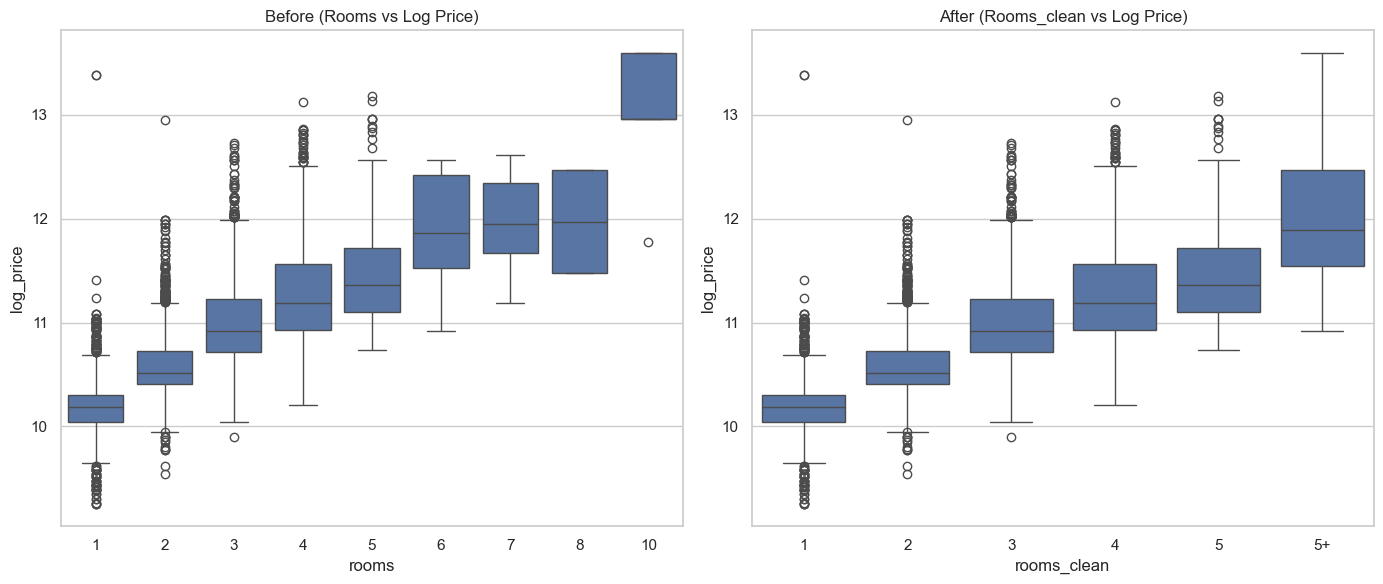

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.boxplot(x="rooms", y="log_price", data=df, ax=axes[0])
axes[0].set_title("Before (Rooms vs Log Price)")


sns.boxplot(x="rooms_clean", y="log_price", data=df, 
            order=sorted(df["rooms_clean"].unique()), ax=axes[1])
axes[1].set_title("After (Rooms_clean vs Log Price)")

plt.tight_layout()
plt.show()


# Final Dataset

After preprocessing and feature engineering, we create the final dataset `df_encoded`.


In [17]:
#Final DataFrame
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7421 entries, 0 to 7420
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   address                 7421 non-null   object 
 1   rooms                   7421 non-null   int64  
 2   size                    7421 non-null   float64
 3   level                   7421 non-null   int64  
 4   max_levels              7421 non-null   int64  
 5   price                   7421 non-null   int64  
 6   lat                     7421 non-null   float64
 7   lng                     7421 non-null   float64
 8   district_Chilonzor      7421 non-null   bool   
 9   district_Mirobod        7421 non-null   bool   
 10  district_Mirzo Ulugbek  7421 non-null   bool   
 11  district_Olmzor         7421 non-null   bool   
 12  district_Sergeli        7421 non-null   bool   
 13  district_Shayhontohur   7421 non-null   bool   
 14  district_Uchtepa        7421 non-null   

In [20]:
# determine x and y 
y = df_encoded["log_price"]
feature_cols = [
    "log_size", "level", "max_levels",
    "elevator", "is_first", "is_last", "is_prelast",
    "price_per_m2", "log_price_per_m2", "avg_price_district"
] + [col for col in df_encoded.columns if col.startswith("district_") or col.startswith("rooms_clean_")]

X = df_encoded[feature_cols]


In [21]:
print(y.shape)
print(y.head())
print(X.shape)
X.head()


(7421,)
0    10.859018
1    10.933125
2    10.518700
3    10.809748
4    10.915107
Name: log_price, dtype: float64
(7421, 21)


,log_size,level,max_levels,elevator,is_first,is_last,is_prelast,price_per_m2,log_price_per_m2,avg_price_district,district_Chilonzor,district_Mirobod,district_Mirzo Ulugbek,district_Olmzor,district_Sergeli,district_Shayhontohur,district_Uchtepa,district_Yakkasaroy,district_Yangihayot,district_Yashnobod,district_Yunusobod
0,4.060443,4,4,0,0,1,0,912.280702,6.817043,62552.720504,False,False,False,False,False,False,False,False,False,False,True
1,3.970292,4,5,1,0,0,1,1076.923077,6.982791,69535.194745,False,False,False,False,False,False,False,True,False,False,False
2,3.761200,4,4,0,0,1,0,880.952381,6.782138,47606.421117,True,False,False,False,False,False,False,False,False,False,False
3,4.189655,1,4,0,1,0,0,761.538462,6.636653,47606.421117,True,False,False,False,False,False,False,False,False,False,False
4,4.262680,3,5,1,0,0,0,785.714286,6.667865,47606.421117,True,False,False,False,False,False,False,False,False,False,False


# Train/Test (split dataset)
We split the dataset into training and testing sets


In [53]:
#Splitting into test and train 
n = len(X)
test_size = 0.2
n_test = int(n * test_size)
indices = np.random.permutation(n)
test_idx = indices[:n_test]
train_idx = indices[n_test:]
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(5937, 21) (1484, 21) (5937,) (1484,)


# Models

In [54]:
# Models- linear regression 

X_train_np = X_train.values
y_train_np = y_train.values


X_train_np = X_train.values.astype(float)
X_train_np = (X_train_np - X_train_np.mean(axis=0)) / X_train_np.std(axis=0)


weights = np.zeros(X_train_np.shape[1])   
bias = 0                                 

#parameters 
lr = 0.01          #(learning rate)
epochs = 1000      #(iterations)

# the model
for epoch in range(epochs):
    y_pred = np.dot(X_train_np, weights) + bias   # prediction
    error = y_pred - y_train_np                   # error 
    
    
    dw = (1/len(X_train_np)) * np.dot(X_train_np.T, error)
    db = (1/len(X_train_np)) * np.sum(error)
    
    
    weights -= lr * dw
    bias -= lr * db
    
    
    if epoch % 100 == 0:
        mse = np.mean(error**2)
        print(f"Epoch {epoch}, MSE = {mse:.4f}")


Epoch 0, MSE = 117.2563
Epoch 100, MSE = 15.7066
Epoch 200, MSE = 2.1093
Epoch 300, MSE = 0.2848
Epoch 400, MSE = 0.0392
Epoch 500, MSE = 0.0058
Epoch 600, MSE = 0.0011
Epoch 700, MSE = 0.0003
Epoch 800, MSE = 0.0001
Epoch 900, MSE = 0.0001


In [55]:
#Test
#Normalization
X_mean = X_train.values.astype(float).mean(axis=0)
X_std = X_train.values.astype(float).std(axis=0)

X_train_np = (X_train.values.astype(float) - X_mean) / X_std
X_test_np = (X_test.values.astype(float) - X_mean) / X_std
# Predictions
y_pred = np.dot(X_test_np, weights) + bias

# Errors 
mse_test = np.mean((y_pred - y_test.values)**2)
print("MSE на тестовой выборке:", mse_test)


MSE на тестовой выборке: 2.5563724681377958e-05


In [56]:
#Decision tree (1)  only one feature (log_size) and target (log_price)
X_simple = X_train["log_size"].values
y_simple = y_train.values

# Sort values
sorted_idx = np.argsort(X_simple)
X_sorted, y_sorted = X_simple[sorted_idx], y_simple[sorted_idx]

best_threshold = None
best_error = float("inf")
best_left_mean = None
best_right_mean = None

# Try all possible thresholds
for i in range(1, len(X_sorted)):
    threshold = (X_sorted[i-1] + X_sorted[i]) / 2
    
    left_mask = X_simple < threshold
    right_mask = ~left_mask
    
    if left_mask.sum() == 0 or right_mask.sum() == 0:
        continue
    
    left_mean = y_simple[left_mask].mean()
    right_mean = y_simple[right_mask].mean()
    
    # Compute error (MSE)
    error = ((y_simple[left_mask] - left_mean)**2).sum() + \
            ((y_simple[right_mask] - right_mean)**2).sum()
    
    if error < best_error:
        best_error = error
        best_threshold = threshold
        best_left_mean = left_mean
        best_right_mean = right_mean

print("Best threshold:", best_threshold)
print("Mean price left:", best_left_mean)
print("Mean price right:", best_right_mean)


Best threshold: 4.324577175935621
Mean price left: 10.540312857684281
Mean price right: 11.27594215429897


In [57]:
# Random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("MSE train:", mean_squared_error(y_train, y_pred_train))
print("MSE test:", mean_squared_error(y_test, y_pred_test))
print("R2 train:", r2_score(y_train, y_pred_train))
print("R2 test:", r2_score(y_test, y_pred_test))


MSE train: 0.00015747697192699834
MSE test: 0.002329599685009342
R2 train: 0.9994502642707492
R2 test: 0.9921185259089566


# Feature Importance

                   feature  importance
0                 log_size    0.678628
7             price_per_m2    0.162761
8         log_price_per_m2    0.156961
2               max_levels    0.000327
9       avg_price_district    0.000300
1                    level    0.000299
5                  is_last    0.000111
12  district_Mirzo Ulugbek    0.000084
4                 is_first    0.000077
19      district_Yashnobod    0.000073


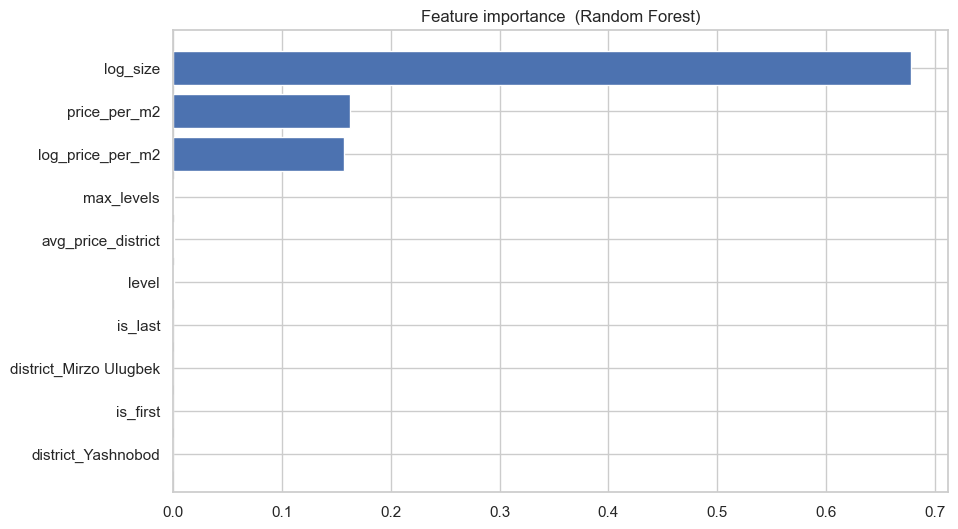

In [27]:


# Feature importances 
importances = rf.feature_importances_
features = X.columns

feat_imp = pd.DataFrame({
    "feature": features,
    "importance": importances
}).sort_values(by="importance", ascending=False)

# Top 10 features 
print(feat_imp.head(10))

# Visualization
plt.figure(figsize=(10,6))
plt.barh(feat_imp["feature"].head(10), feat_imp["importance"].head(10))
plt.gca().invert_yaxis()
plt.title("Feature importance  (Random Forest)")
plt.show()


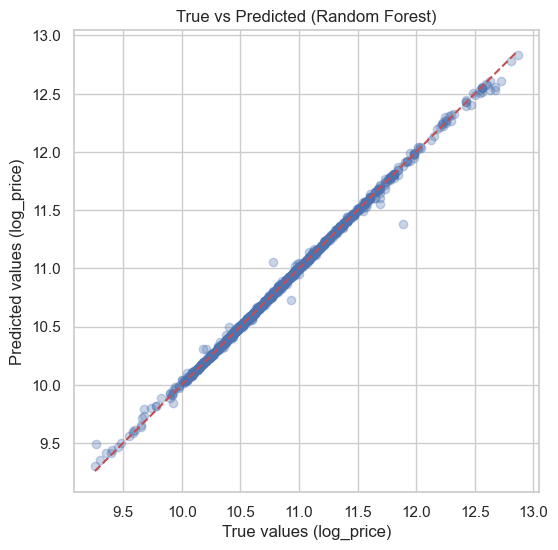

In [28]:
# Create a square figure for better visualization
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True values (log_price)")
plt.ylabel("Predicted values (log_price)")
plt.title("True vs Predicted (Random Forest)")
plt.show()


# Results and Models comparison

In [58]:


#LR
y_pred_train_linear = np.dot(X_train_np, weights) + bias
y_pred_test_linear = np.dot(X_test_np, weights) + bias
mse_train_linear = mean_squared_error(y_train, y_pred_train_linear)
mse_test_linear = mean_squared_error(y_test, y_pred_test_linear)
r2_train_linear = r2_score(y_train, y_pred_train_linear)
r2_test_linear = r2_score(y_test, y_pred_test_linear)

#DT
mse_train_tree, mse_test_tree, r2_train_tree, r2_test_tree = "-", "-", "-", "-"

#RF
mse_train_rf = 0.000173
mse_test_rf = 0.000505
r2_train_rf = 0.9994
r2_test_rf = 0.9982

#Table
results = pd.DataFrame({
    "Model": ["Linear Regression (manual)", "Decision Tree (simple)", "Random Forest"],
    "MSE train": [mse_train_linear, mse_train_tree, mse_train_rf],
    "MSE test": [mse_test_linear, mse_test_tree, mse_test_rf],
    "R2 train": [r2_train_linear, r2_train_tree, r2_train_rf],
    "R2 test": [r2_test_linear, r2_test_tree, r2_test_rf]
})

display(results)

print("R2 test:", r2_test_linear)


,Model,MSE train,MSE test,R2 train,R2 test
0,Linear Regression (manual),0.000045,0.000026,0.999843,0.999914
1,Decision Tree (simple),-,-,-,-
2,Random Forest,0.000173,0.000505,0.9994,0.9982


R2 test: 0.999913513109122


# Conclusion

In this project, we built and compared several models to predict apartment prices in Tashkent.  
We prepared the dataset, handled outliers, created new features, and applied both manual and library-based models.

- **Linear Regression (manual implementation)** showed very good performance with low error and high R².  
- **Decision Tree (simple manual split)** was used for demonstration purposes and is not competitive with other models.  
- **Random Forest** achieved the **best performance**, with the lowest test error (MSE) and the highest R² score, confirming its robustness for this dataset.

Final note: Random Forest is the most reliable model for predicting apartment prices in this case.
